In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# datapath = 'data/aba_posts_labeled_cleaned.csv'
datapath = 'data/aba_posts_labeled_cleaned_full_set.csv'
data = pd.read_csv(datapath)

In [3]:
data.head(3)

,Document,sentiment,layperson,aba professional,parent,other_professional,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Positive,True,False,False,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Document            3448 non-null   object
 1   sentiment           3448 non-null   object
 2   layperson           3448 non-null   bool  
 3   aba professional    3448 non-null   bool  
 4   parent              3448 non-null   bool  
 5   other_professional  3448 non-null   bool  
 6   asd                 3448 non-null   bool  
dtypes: bool(5), object(2)
memory usage: 70.8+ KB


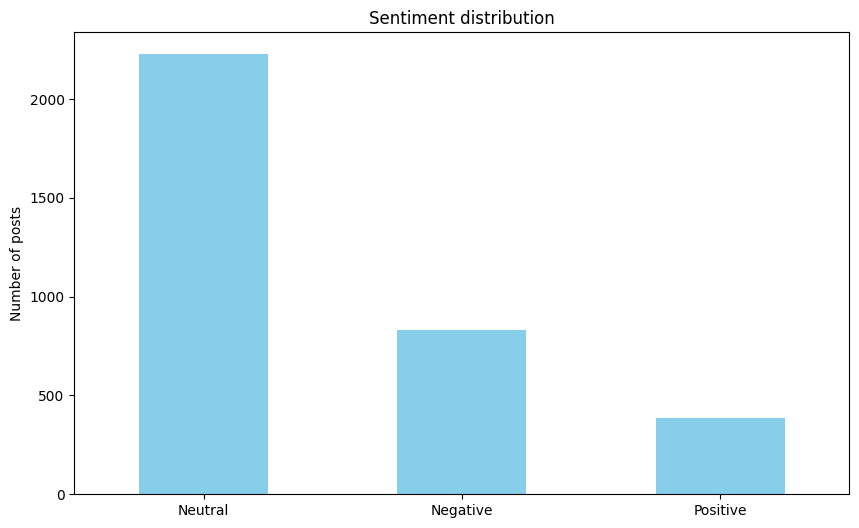

In [5]:
# plot sentiment
true_counts = data['sentiment'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
ax = true_counts.plot(kind='bar', color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Sentiment distribution')
plt.xlabel('')
plt.ylabel('Number of posts')
plt.show()

In [6]:
data.sentiment.value_counts()

sentiment
Neutral     2227
Negative     834
Positive     387
Name: count, dtype: int64

In [191]:
# drop sentiment
authors = data.drop(columns='sentiment')
authors.head(3)

,Document,layperson,aba professional,parent,other_professional,asd
0,Is she in ABA therapy I only ask because my hu...,True,False,False,False,False
1,I heard you are able to ask them questions May...,True,False,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,True,False,False,False,False


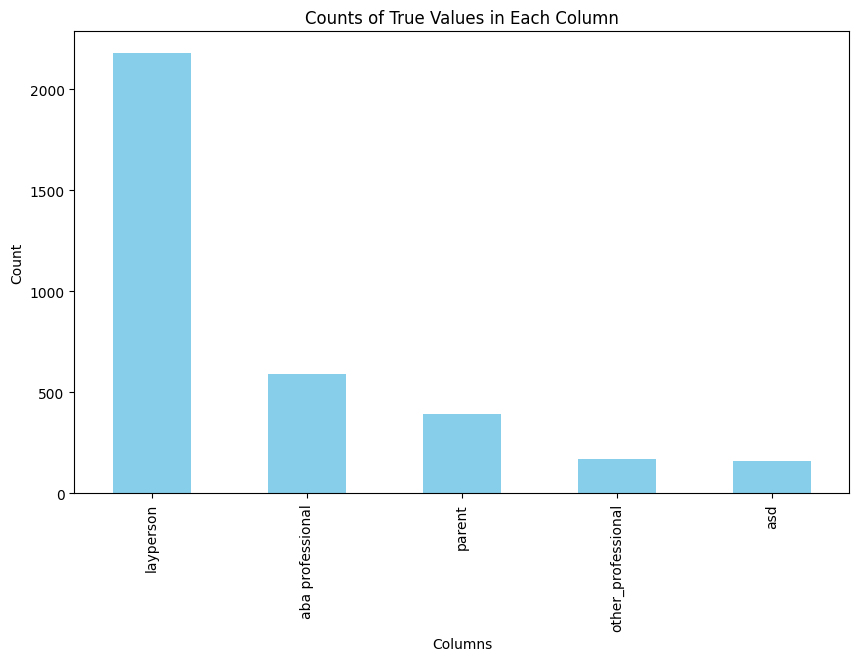

In [192]:
# plot categories
author_categories = authors.drop(columns='Document')
true_counts = author_categories.sum()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
true_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of True Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [193]:
# select rows where other_professional is True
other_professionals = authors[authors['other_professional'] == True]
other_professionals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 7 to 3442
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Document            172 non-null    object
 1   layperson           172 non-null    bool  
 2   aba professional    172 non-null    bool  
 3   parent              172 non-null    bool  
 4   other_professional  172 non-null    bool  
 5   asd                 172 non-null    bool  
dtypes: bool(5), object(1)
memory usage: 3.5+ KB


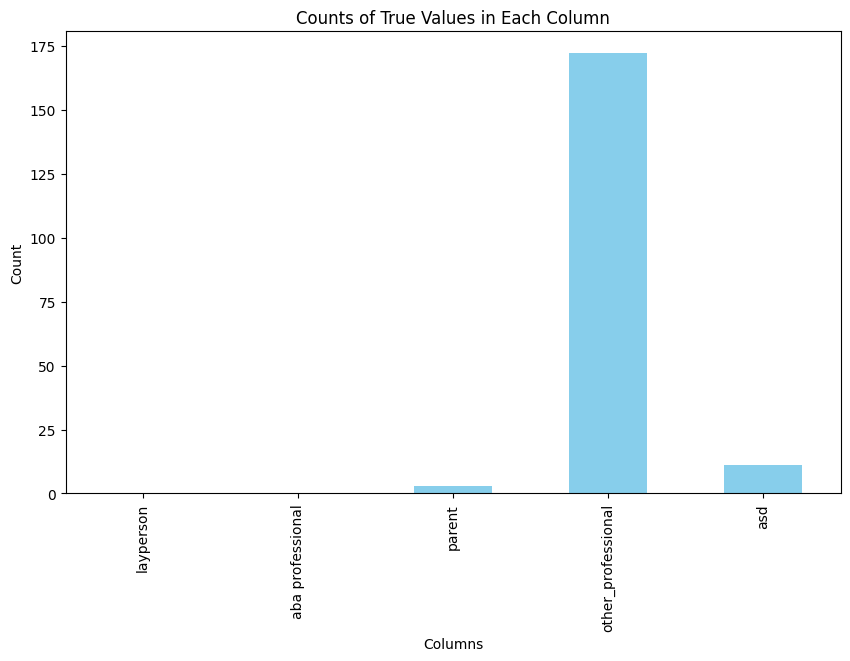

In [194]:
author_categories = other_professionals.drop(columns='Document')
true_counts = author_categories.sum()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
true_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of True Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

# some people in the other professional category also have asd or are parents

In [195]:
data.other_professional.value_counts()

other_professional
False    3276
True      172
Name: count, dtype: int64

In [196]:
filtered_data = author_categories.drop(columns=['layperson', 'aba professional', 'other_professional'])
filtered_data[filtered_data.any(axis=1)]

,parent,asd
7,False,True
65,True,False
115,False,True
227,False,True
491,False,True
526,False,True
1949,False,True
2056,True,False
2244,True,False
2326,False,True


In [197]:
data[(data['parent'] == True) & (data['other_professional'] == True)]

,Document,sentiment,layperson,aba professional,parent,other_professional,asd
65,Occupational therapist though I work mostly wi...,Positive,False,False,True,True,False
2056,I have my son with the same company that I wor...,Neutral,False,False,True,True,False
2244,My kid needs behavioural therapy due to her di...,Positive,False,False,True,True,False


In [198]:
data[(data['asd'] == True) & (data['other_professional'] == True)]

,Document,sentiment,layperson,aba professional,parent,other_professional,asd
7,Hi there Clinical psychologist with ASD here P...,Negative,False,False,False,True,True
115,ABA Therapy thoughts I m an autistic adult and...,Negative,False,False,False,True,True
227,Hi I m an autistic OT and even new reformed AB...,Negative,False,False,False,True,True
491,Actually you aren't correct I have seen you in...,Negative,False,False,False,True,True
526,Hello there I am an autistic social worker I d...,Negative,False,False,False,True,True
1949,I've worked in a clinic where they used ABA Ho...,Negative,False,False,False,True,True
2326,You will be shunned by the majority of the aut...,Negative,False,False,False,True,True
2628,Hey I'm an autistic psychiatrist I think you a...,Negative,False,False,False,True,True
2637,I m autistic and I worked in ABA before becomi...,Negative,False,False,False,True,True
2653,I m currently a one to one para in an aba type...,Neutral,False,False,False,True,True


In [199]:
# change the value of other_professional to false is the person is also a parent
selected_rows = data[(data['parent'] == True) & (data['other_professional'] == True)]
data.loc[selected_rows.index, 'other_professional'] = False
# change the value of other_professional to false is the person also has asd
selected_rows = data[(data['asd'] == True) & (data['other_professional'] == True)]
data.loc[selected_rows.index, 'other_professional'] = False

In [200]:
data[(data['parent'] == True) & (data['other_professional'] == True)]

,Document,sentiment,layperson,aba professional,parent,other_professional,asd


In [201]:
data[(data['asd'] == True) & (data['other_professional'] == True)]

,Document,sentiment,layperson,aba professional,parent,other_professional,asd


In [202]:
data.other_professional.value_counts()

other_professional
False    3290
True      158
Name: count, dtype: int64

In [203]:
data.layperson.value_counts()

layperson
True     2178
False    1270
Name: count, dtype: int64

In [204]:
# change the value of other professional to layman 
data.loc[data['other_professional'] == True, 'layperson'] = True
# drop the other professional column
data = data.drop(columns='other_professional')
data.head(3)


,Document,sentiment,layperson,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Positive,True,False,False,False


In [205]:
data.layperson.value_counts()

layperson
True     2336
False    1112
Name: count, dtype: int64

In [206]:
# rename 'layman' column to 'other'
data.rename(columns={'layperson': 'other'}, inplace=True)
data.head(3)

,Document,sentiment,other,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Positive,True,False,False,False


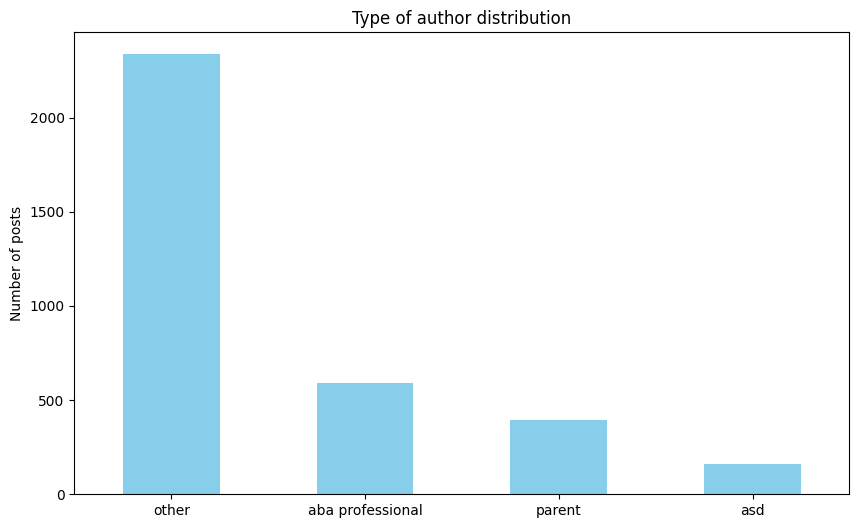

In [207]:
# plot categories
author_categories = data.drop(columns=['Document', 'sentiment'])
true_counts = author_categories.sum()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
ax = true_counts.plot(kind='bar', color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Type of author distribution')
plt.xlabel('')
plt.ylabel('Number of posts')
plt.show()

In [208]:
print(author_categories.other.value_counts())
print(50*'_')
print(author_categories['aba professional'].value_counts())
print(50*'_')
print(author_categories.parent.value_counts())
print(50*'_')
print(author_categories.asd.value_counts())


other
True     2336
False    1112
Name: count, dtype: int64
__________________________________________________
aba professional
False    2858
True      590
Name: count, dtype: int64
__________________________________________________
parent
False    3056
True      392
Name: count, dtype: int64
__________________________________________________
asd
False    3286
True      162
Name: count, dtype: int64


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          3448 non-null   object
 1   sentiment         3448 non-null   object
 2   other             3448 non-null   bool  
 3   aba professional  3448 non-null   bool  
 4   parent            3448 non-null   bool  
 5   asd               3448 non-null   bool  
dtypes: bool(4), object(2)
memory usage: 67.5+ KB


In [210]:
data.head()

,Document,sentiment,other,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Positive,True,False,False,False
3,Thank you so so much for sharing your experien...,Positive,False,False,True,False
4,Thank you that makes a lot of sense Seems pret...,Neutral,True,False,False,False


In [3]:
filepath = 'data/aba_posts_re_labeled_cleaned_full_set.csv'
data = pd.read_csv(filepath)
data.head(3)

,Document,sentiment,other,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Positive,True,False,False,False


In [4]:
data = data.drop(['sentiment', 'other'], axis=1)
data.head(3)

,Document,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,False,False,False
1,I heard you are able to ask them questions May...,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,False,False,False


In [5]:
# convert boolean values to integers

data[['aba professional', 'parent', 'asd']] = data[['aba professional', 'parent', 'asd']].astype(int)
data.head(3)

,Document,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,0,0,0
1,I heard you are able to ask them questions May...,0,0,0
2,I agree with that Even dr Lovaas said ABA does...,0,0,0


In [6]:
author_categories = ['aba professional', 'parent', 'asd']
data[author_categories].value_counts()

aba professional  parent  asd
0                 0       0      2336
1                 0       0       564
0                 1       0       383
                  0       1       133
1                 0       1        23
0                 1       1         6
1                 1       0         3
Name: count, dtype: int64

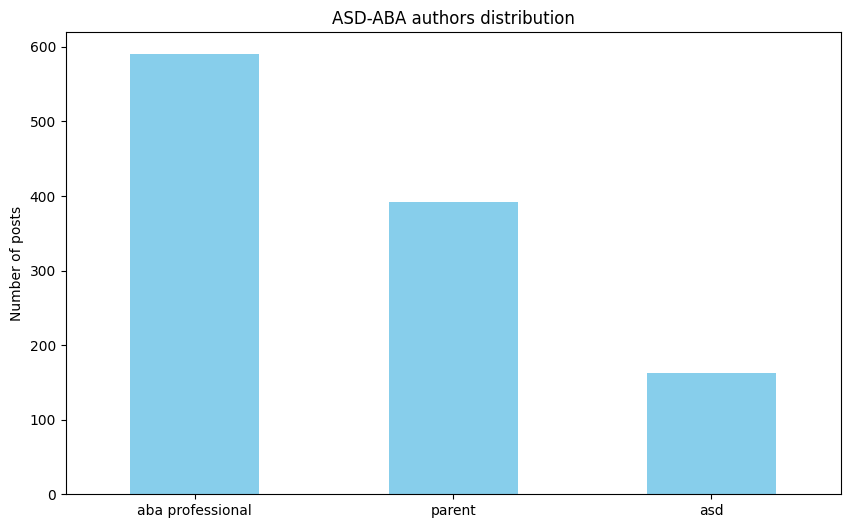

aba professional
0    2858
1     590
Name: count, dtype: int64
parent
0    3056
1     392
Name: count, dtype: int64
asd
0    3286
1     162
Name: count, dtype: int64


In [7]:
# plot categories
true_counts = data[author_categories].sum()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
ax = true_counts.plot(kind='bar', color='skyblue')
plt.title('ASD-ABA authors distribution')
plt.xlabel('')
plt.ylabel('Number of posts')
ax.set_xticklabels(author_categories, rotation=0)
plt.show()

print(data['aba professional'].value_counts())
print(data['parent'].value_counts())
print(data['asd'].value_counts())

In [8]:
%%capture
%pip install scikit-multilearn
%pip install iterative-stratification

In [9]:
X = data[['Document']]
y = data[author_categories]
X.shape, y.shape

((3448, 1), (3448, 3))

In [10]:
# because multilabel classification, stratification needs to take into account the distribution of pair columns as well and individual ones
#  https://github.com/trent-b/iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

msss = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=7)

for train_index, test_index in msss.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data.iloc[train_index], data.iloc[test_index]

print(data_train.shape, data_test.shape)

(2758, 4) (690, 4)


In [11]:
data_train[author_categories].value_counts()

aba professional  parent  asd
0                 0       0      1869
1                 0       0       450
0                 1       0       306
                  0       1       106
1                 0       1        19
0                 1       1         5
1                 1       0         3
Name: count, dtype: int64

In [12]:
data_test[author_categories].value_counts()

aba professional  parent  asd
0                 0       0      467
1                 0       0      114
0                 1       0       77
                  0       1       27
1                 0       1        4
0                 1       1        1
Name: count, dtype: int64

In [19]:
print('train data:\n',data_train.info(), '\n')
print('test data:\n',data_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2758 entries, 0 to 3447
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          2758 non-null   object
 1   aba professional  2758 non-null   int64 
 2   parent            2758 non-null   int64 
 3   asd               2758 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 107.7+ KB
train data:
 None 

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 6 to 3444
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          690 non-null    object
 1   aba professional  690 non-null    int64 
 2   parent            690 non-null    int64 
 3   asd               690 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 27.0+ KB
test data:
 None


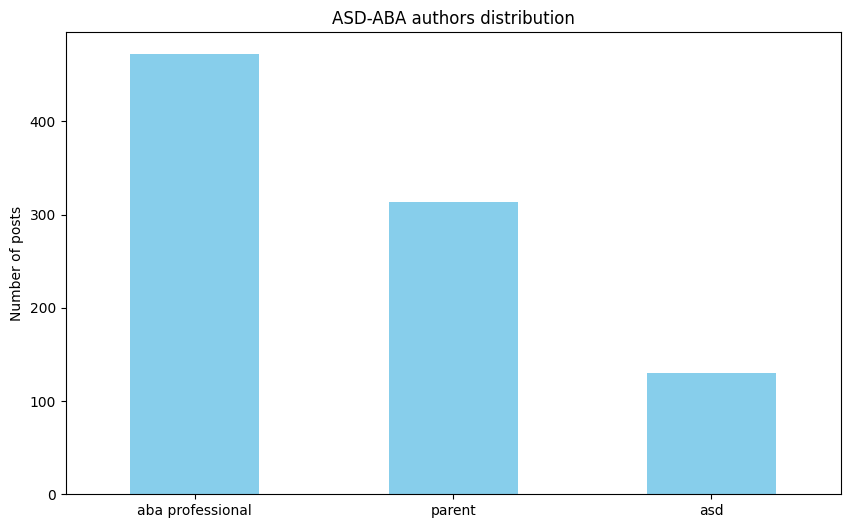

aba professional
0    2286
1     472
Name: count, dtype: int64
parent
0    2444
1     314
Name: count, dtype: int64
asd
0    2628
1     130
Name: count, dtype: int64


In [15]:
# plot categories
true_counts = data_train[author_categories].sum()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
ax = true_counts.plot(kind='bar', color='skyblue')
plt.title('ASD-ABA authors distribution')
plt.xlabel('')
plt.ylabel('Number of posts')
ax.set_xticklabels(author_categories, rotation=0)
plt.show()

print(data_train['aba professional'].value_counts())
print(data_train['parent'].value_counts())
print(data_train['asd'].value_counts())

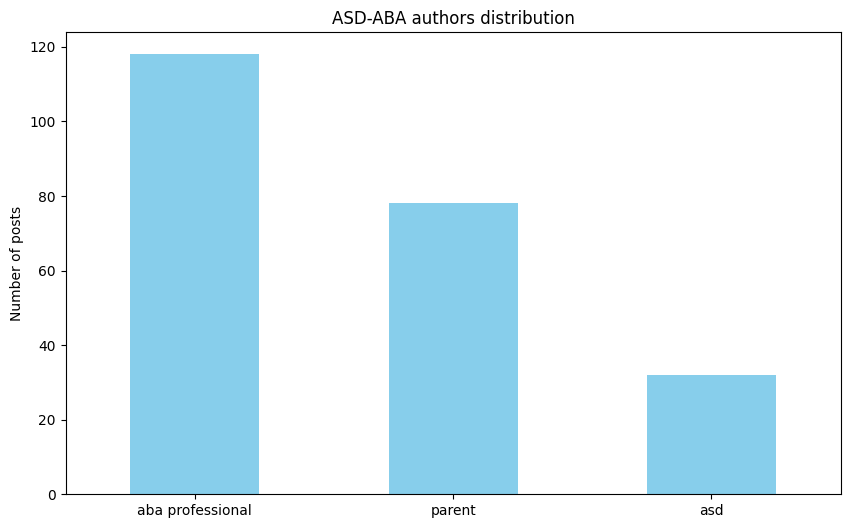

aba professional
0    572
1    118
Name: count, dtype: int64
parent
0    612
1     78
Name: count, dtype: int64
asd
0    658
1     32
Name: count, dtype: int64


In [18]:
# plot categories
true_counts = data_test[author_categories].sum()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
ax = true_counts.plot(kind='bar', color='skyblue')
plt.title('ASD-ABA authors distribution')
plt.xlabel('')
plt.ylabel('Number of posts')
ax.set_xticklabels(author_categories, rotation=0)
plt.show()

print(data_test['aba professional'].value_counts())
print(data_test['parent'].value_counts())
print(data_test['asd'].value_counts())

In [ ]:
# from skmultilearn.model_selection import IterativeStratification
# from sklearn.utils import shuffle
# random_state = 7
# X_shuffled, y_shuffled = shuffle(X, y, random_state=random_state)

# stratifier = IterativeStratification(n_splits=2, order=2, sample_distribution_per_fold=[0.2, 0.8])
# train_indexes, test_indexes = next(stratifier.split(X_shuffled, y_shuffled))
# X_train, y_train = X_shuffled.loc[train_indexes], y_shuffled.loc[train_indexes]
# X_test, y_test = X_shuffled.loc[test_indexes], y_shuffled.loc[test_indexes]

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [20]:
attributes = author_categories
attributes

['aba professional', 'parent', 'asd']

In [24]:
# example of MultilabelStratifiedKFold on dummy data
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np

X = np.array([[1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2], [3,4], [1,2]])
y = np.array([[0,0], [0,0], [0,1], [0,1], [1,1], [1,1], [1,0], [1,0], [1,0]])

mskf = MultilabelStratifiedKFold(n_splits=3, shuffle=True, random_state=0)

for train_index, test_index in mskf.split(X, y):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 2 3 6 7 8] TEST: [1 4 5]
TRAIN: [0 1 3 4 5 7] TEST: [2 6 8]
TRAIN: [1 2 4 5 6 8] TEST: [0 3 7]
